In [1]:
# Packages
# Data Processing
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
# Statistics
import math
from scipy import stats
from scipy.stats import norm
# File Path
import os

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_climate = pd.read_csv("climate_change_indicators.csv")


In [3]:
df_climate

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [4]:
# subsetting
df_climate = df_climate[[
#     'ObjectId', 
    'Country', 
#     'ISO2', 
    'ISO3', 
#     'Indicator', 'Unit', 'Source',
#     'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 
    'F1961', 'F1962',
    'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
    'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
    'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
    'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
    'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
    'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
    'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
    'F2019', 'F2020', 'F2021', 'F2022'
]].copy()

In [5]:
df_climate

,Country,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,ESH,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,World,WLD,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,"Yemen, Rep. of",YEM,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Zambia,ZMB,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


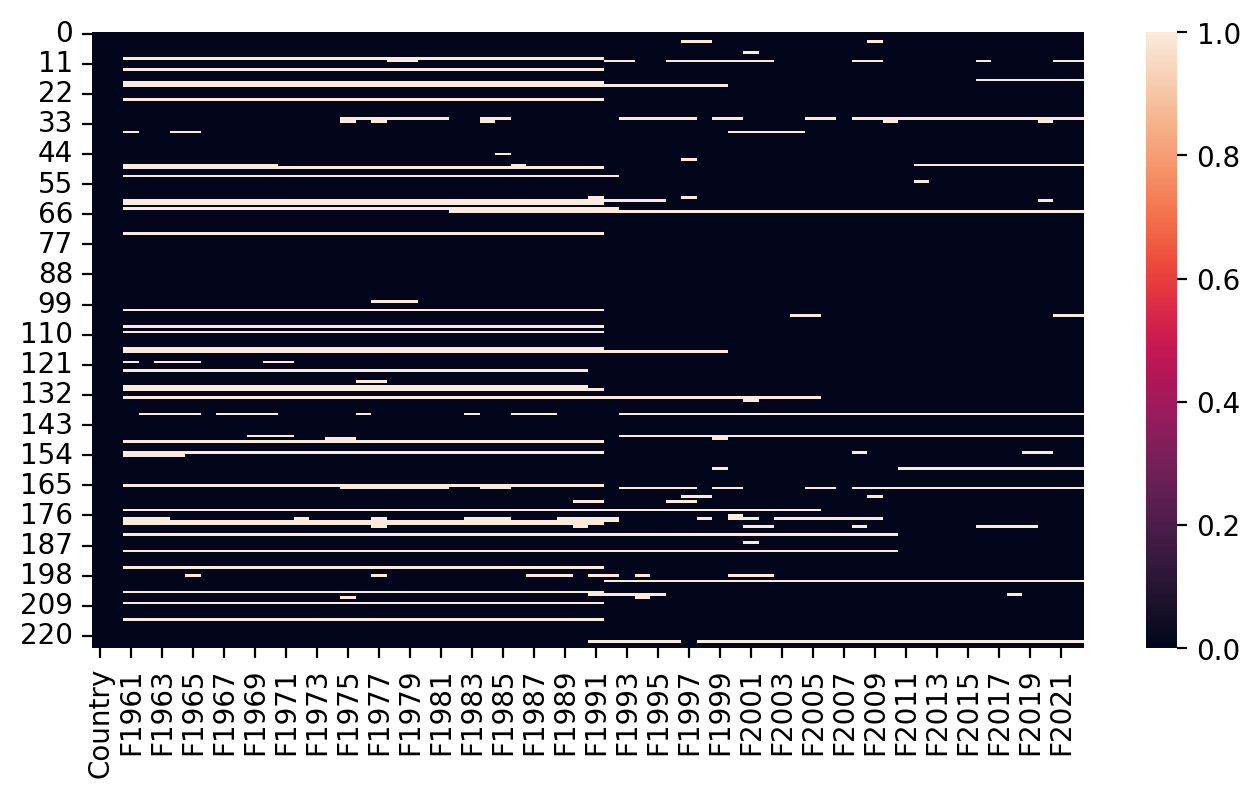

In [6]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df_climate.isnull(), vmin = 0, vmax = 1
)

plt.show()


In [7]:
df_climate.isnull().sum()[[
    'F1990', 'F1991', 'F1992', 'F1993'
]]

F1990    36
F1991    37
F1992    17
F1993    16
dtype: int64

In [8]:
df_climate_dim = df_climate[[
    'Country', 'ISO3', 
    'F1992', 'F2002', 'F2012', 'F2022'
]]
df_climate_dim.head()

,Country,ISO3,F1992,F2002,F2012,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012
1,Albania,ALB,0.106,0.492,1.487,1.518
2,Algeria,DZA,-0.312,1.258,1.147,1.688
3,American Samoa,ASM,0.344,1.152,0.924,1.256
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243


In [9]:
df_climate_dim = df_climate_dim.dropna().reset_index(drop = True).copy()


In [10]:
df_climate_dim

,Country,ISO3,F1992,F2002,F2012,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012
1,Albania,ALB,0.106,0.492,1.487,1.518
2,Algeria,DZA,-0.312,1.258,1.147,1.688
3,American Samoa,ASM,0.344,1.152,0.924,1.256
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243
...,...,...,...,...,...,...
192,West Bank and Gaza,PSE,-1.045,0.728,1.043,1.074
193,Western Sahara,ESH,0.529,1.249,1.344,1.970
194,World,WLD,0.184,1.021,1.074,1.394
195,Zambia,ZMB,0.544,0.711,0.972,0.686


In [11]:
from sklearn.cluster import KMeans


C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

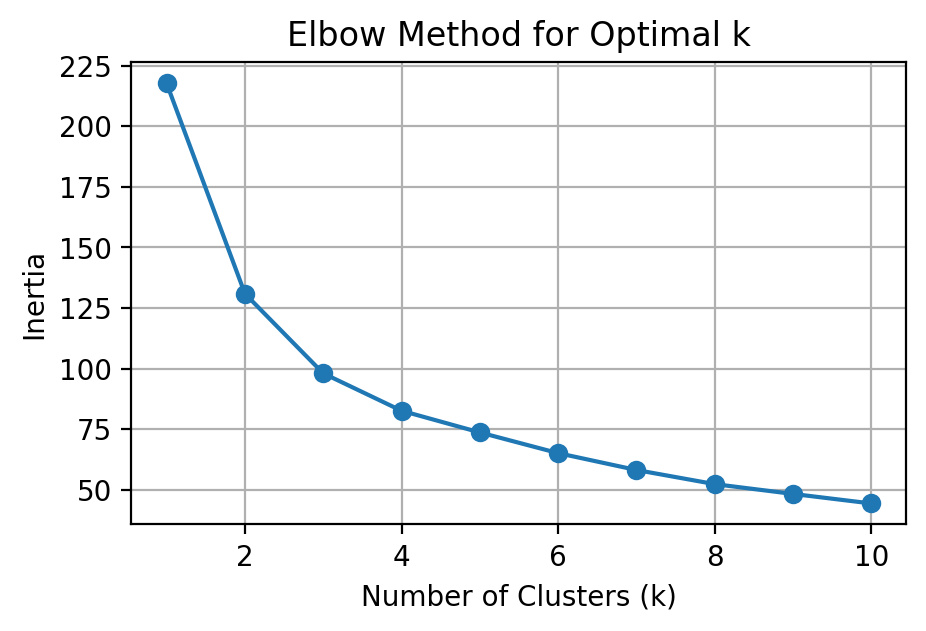

In [12]:
# select the columns for clustering
X = df_climate_dim.iloc[:, 2:]

# list to store the inertia values
list_inertia = []

# range of cluster numbers
k_range = range(1, 11)

# calculate inertia
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 84)
    kmeans.fit(X)
    list_inertia.append(kmeans.inertia_)

# plotting
plt.figure(figsize = (5, 3), facecolor = "white")
plt.plot(k_range, list_inertia, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [13]:
n_clusters = 3

# clustering
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 84)
df_climate_dim['Cluster'] = kmeans.fit_predict(X)

# Display the clustered data
display(df_climate_dim)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Country,ISO3,F1992,F2002,F2012,F2022,Cluster
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012,0
1,Albania,ALB,0.106,0.492,1.487,1.518,1
2,Algeria,DZA,-0.312,1.258,1.147,1.688,0
3,American Samoa,ASM,0.344,1.152,0.924,1.256,1
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243,2
...,...,...,...,...,...,...,...
192,West Bank and Gaza,PSE,-1.045,0.728,1.043,1.074,0
193,Western Sahara,ESH,0.529,1.249,1.344,1.970,2
194,World,WLD,0.184,1.021,1.074,1.394,1
195,Zambia,ZMB,0.544,0.711,0.972,0.686,1


In [14]:
df_climate_dim['Cluster'].value_counts()


Cluster
1    125
2     48
0     24
Name: count, dtype: int64

In [15]:
# table
df_cluster_stats = df_climate_dim.groupby('Cluster').agg({
    'F1992': ['mean', 'std', 'min', 'max'],
    'F2002': ['mean', 'std', 'min', 'max'],
    'F2012': ['mean', 'std', 'min', 'max'],
    'F2022': ['mean', 'std', 'min', 'max']
}).round(3)
display(df_cluster_stats.T)

Cluster         0      1      2
F1992 mean -0.798  0.262  0.705
      std   0.384  0.350  0.457
      min  -1.344 -0.716 -0.059
      max   0.100  1.147  1.601
F2002 mean  1.039  0.740  1.332
      std   0.404  0.224  0.352
      min   0.009  0.017  0.681
      max   1.716  1.380  2.255
F2012 mean  1.178  0.672  1.314
      std   0.459  0.251  0.428
      min  -0.032 -0.128  0.230
      max   2.144  1.487  2.089
F2022 mean  1.636  0.991  2.218
      std   0.415  0.427  0.356
      min   1.040 -1.305  1.405
      max   2.370  1.840  3.243

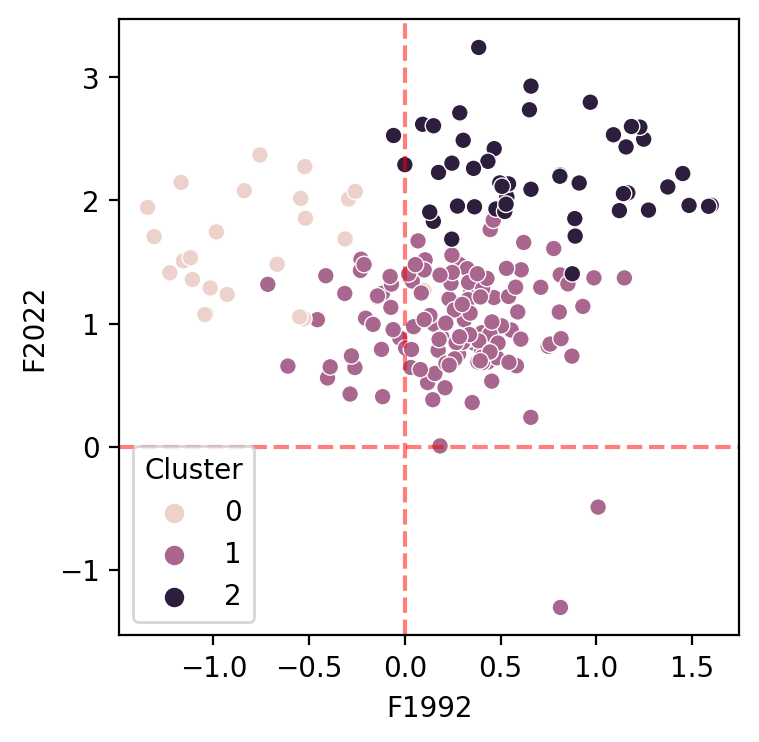

In [16]:
# scatterplot
plt.figure(figsize = (4, 4), facecolor = "white")
sns.scatterplot(
    data = df_climate_dim,
    x = 'F1992', y = 'F2022',
    hue = 'Cluster'
)
plt.axhline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.axvline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.show()

In [17]:
list(df_climate_dim.query("Cluster == 0")['Country'])


['Afghanistan, Islamic Rep. of',
 'Algeria',
 'Armenia, Rep. of',
 'Azerbaijan, Rep. of',
 'Bahrain, Kingdom of',
 'Canada',
 'Cyprus',
 'Georgia',
 'Greece',
 'Greenland',
 'Iran, Islamic Rep. of',
 'Iraq',
 'Israel',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Oman',
 'Qatar',
 'Saint Pierre and Miquelon',
 'Saudi Arabia',
 'Syrian Arab Rep.',
 'Tajikistan, Rep. of',
 'United Arab Emirates',
 'West Bank and Gaza']

In [18]:
list(df_climate_dim.query("Cluster == 2")['Country'])


['Andorra, Principality of',
 'Austria',
 'Belarus, Rep. of',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Cabo Verde',
 'China, P.R.: Mainland',
 'Croatia, Rep. of',
 'Denmark',
 'Estonia, Rep. of',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Holy See',
 'Hungary',
 'Italy',
 'Kazakhstan, Rep. of',
 'Kyrgyz Rep.',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Malta',
 'Mauritania, Islamic Rep. of',
 'Moldova, Rep. of',
 'Monaco',
 'Mongolia',
 'Morocco',
 'Netherlands, The',
 'New Caledonia',
 'Norway',
 'Poland, Rep. of',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Saint Helena',
 'San Marino, Rep. of',
 'Senegal',
 'Slovenia, Rep. of',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tunisia',
 'Turkmenistan',
 'Ukraine',
 'United Kingdom',
 'Uzbekistan, Rep. of',
 'Western Sahara']